In [1]:
import numpy as np
import open3d as o3d
import pandas as pd
from matplotlib import pyplot as plt 

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
pcd = o3d.io.read_point_cloud("Test2.pcd")

In [3]:
out_arr = np.asarray(pcd.points)  

/tmp/ipykernel_6211/3371085622.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(out_arr[:,0], out_arr[:,1], out_arr[:,2], cmap='Greens');


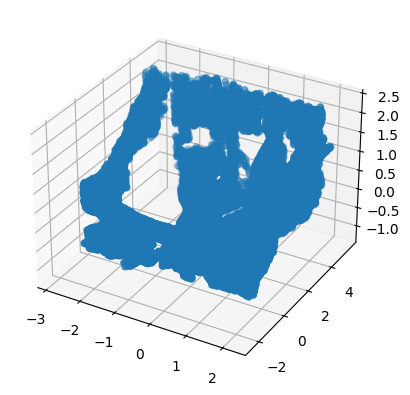

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(out_arr[:,0], out_arr[:,1], out_arr[:,2], cmap='Greens');

In [5]:
data = []
points = np.arange(out_arr[:,2].min(), out_arr[:,2].max(), 0.001)
for x in points:
  temp = [[],[]]
  for i in range(out_arr[:,2].size):
    if out_arr[i,2] <= (x+0.001) and out_arr[i,2] >= x:
      temp[0] = np.append(temp[0], out_arr[i,0])
      temp[1] = np.append(temp[1], out_arr[i,1]) 
  temp = np.asarray(temp)    
  data.append(temp)

In [6]:
xpoints = np.arange(out_arr[:,0].min(), out_arr[:,0].max(), 0.001)
ypoints = np.arange(out_arr[:,1].min(), out_arr[:,1].max(), 0.001)

In [7]:
datax = np.zeros(ypoints.shape)
datay = np.zeros(ypoints.shape)
dataset=[]
for d in range(len(data)):
  tempx = []
  for k in data[d][0]:
    xg = []
    i = 0
    for j in xpoints:
      if k >= j and k <= j + 0.001:
        tempx.append(i)
        #datax[i] = 1
      i=i+1
  tempy = []
  for k in data[d][1]:
    xg = []
    i = 0
    for j in ypoints:
      if k >= j and k <= j + 0.001:
        tempy.append(i)
        #datay[i] = 1
      i=i+1 
  dataset.append((tempx,tempy))             
    


In [9]:
map = np.zeros((10000*10000,7))


In [11]:
for i in range(10000):
    for j in range(10000):
        map[10000*i+j,0] = i
        map[10000*i+j,1] = j

In [21]:
for i,j in zip(dataset[922][0],dataset[922][1]):
    map[10000*i+j,2] = 100